Train and fine-tune a Decision Tree for the moons dataset.


a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

b. Split it into a training set and a test set using train_test_split().

c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy

# **1. Define the Problem**
   - Clear problem statement
   - Identify the type of problem (classification, regression, clustering, etc.)

We want a classifier. The dataset has binary labels so it is a binary classification, using DecisionTreeClassifier.

# **2. Data Collection**
   - Search for data sources
   - Acquire and store data

In [1]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4)

moons

(array([[ 1.25268232, -0.07136754],
        [-0.6153314 ,  1.00339642],
        [ 0.90962709, -0.23677689],
        ...,
        [ 1.67208822, -0.38485287],
        [ 0.72259079,  0.45860645],
        [-0.55503347,  0.32608987]]),
 array([1, 0, 1, ..., 1, 0, 0], dtype=int64))

# **3. Exploratory Data Analysis (EDA)**
   - Descriptive statistical analysis (means, medians, standard deviations, etc.)
   - Visualizations (histograms, bar charts, boxplots, correlation matrices, etc.)
   - Identify missing data
   - Detect outliers

In [2]:
X = moons[0]
y = moons[1]

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


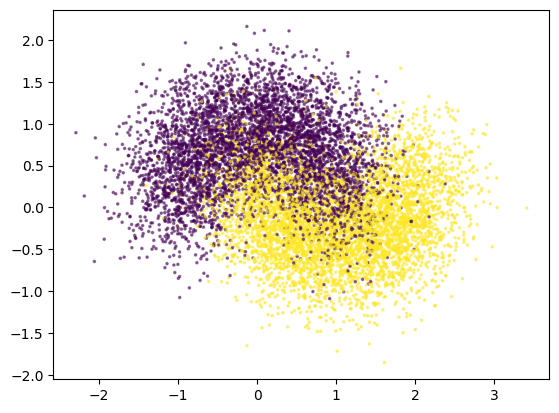

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    alpha=0.5,
    s=2.5
)

# **4. Data Preprocessing**
   - Data cleaning (handle missing data, outlier removal, etc.)
   - Variable transformations (normalization, standardization, encoding categorical variables, etc.)
   - Dimensionality reduction (PCA, t-SNE, etc. if necessary)

# **5. Feature Engineering**
   - Creation of new features from existing ones
   - Feature selection (remove uninformative or redundant features)
   - Convert temporal or cyclical variables (e.g., dates)

#  **6. Data Splitting**
   - Split the data into training, validation (and/or cross-validation), and test sets

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


# **7. Pipelines**
   - Create pipelines that combine preprocessing and modeling steps to automate and streamline the process

# **8. Model Selection**
   - Based on the nature of the problem, select one or several ML algorithms
   - Establish an evaluation metric

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

clf = DecisionTreeClassifier()

criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_leaf_nodes = [*range(2, 100, 10)]
max_depth = [*range(2, 100, 5)]
min_samples_leaf = [*range(2, 100, 10)]
min_samples_split = [*range(2, 100, 10)]

param_grid = {
    'criterion': criterion,
    'splitter': splitter,
    'max_leaf_nodes': max_leaf_nodes,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
    }

search = HalvingGridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# **9. Model Training**
   - Train the model using the training set
   - Use techniques like regularization to prevent overfitting

In [6]:
search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 8000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12000
n_resources: 20


Fitting 5 folds for each of 12000 candidates, totalling 60000 fits
----------
iter: 1
n_candidates: 4000
n_resources: 60
Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
----------
iter: 2
n_candidates: 1334
n_resources: 180
Fitting 5 folds for each of 1334 candidates, totalling 6670 fits
----------
iter: 3
n_candidates: 445
n_resources: 540
Fitting 5 folds for each of 445 candidates, totalling 2225 fits
----------
iter: 4
n_candidates: 149
n_resources: 1620
Fitting 5 folds for each of 149 candidates, totalling 745 fits
----------
iter: 5
n_candidates: 50
n_resources: 4860
Fitting 5 folds for each of 50 candidates, totalling 250 fits


HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': [2, 7, 12, 17, 22, 27, 32, 37, 42,
                                              47, 52, 57, 62, 67, 72, 77, 82,
                                              87, 92, 97],
                                'max_leaf_nodes': [2, 12, 22, 32, 42, 52, 62,
                                                   72, 82, 92],
                                'min_samples_split': [2, 12, 22, 32, 42, 52, 62,
                                                      72, 82, 92],
                                'splitter': ['best', 'random']},
                    scoring='accuracy', verbose=1)

# **10. Model Evaluation**
   - Evaluate the model on the validation set
   - Adjust hyperparameters if necessary
   - Repeat steps 7 and 8 as needed until satisfactory model performance is achieved

In [7]:
best_model = search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=22, max_leaf_nodes=92,
                       min_samples_split=22, splitter='random')

# **10. Testing and Deployment**
   - Evaluate the model on the test set
   - Interpret results and performance metrics

In [9]:
y_pred = best_model.predict(X_test)

# Evaluate classification model. Accuracy, precision, recall, f1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.8615
Precision:  0.8880516684607105
Recall:  0.8266533066132264
F1:  0.8562532433834976


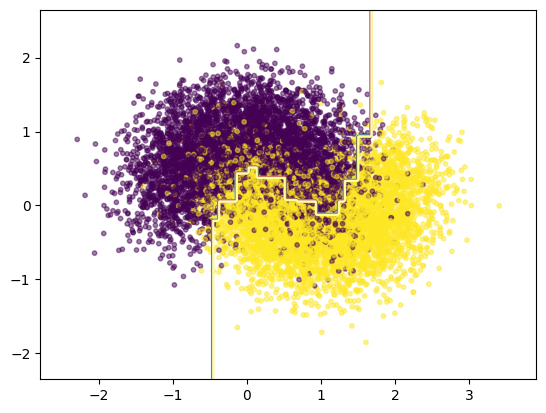

In [22]:
# Plot the entire dataset X, y. Then plot the best_model which is a random forest classifier.

# Plot the entire dataset X, y
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=0.5)

# Plot the best_model decision boundaries using plt.contour.
# Hint: Use np.meshgrid to generate a grid of points.

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Black boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()